In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import PIL

import pathlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [2]:
!unzip /content/drive/MyDrive/DL_CNN.zip

Streaming output truncated to the last 5000 lines.
  inflating: DL_CNN/Cat/11575.jpg    
  inflating: DL_CNN/Cat/11577.jpg    
  inflating: DL_CNN/Cat/11589.jpg    
  inflating: DL_CNN/Cat/11598.jpg    
  inflating: DL_CNN/Cat/1161.jpg     
  inflating: DL_CNN/Cat/11612.jpg    
  inflating: DL_CNN/Cat/11636.jpg    
  inflating: DL_CNN/Cat/11657.jpg    
  inflating: DL_CNN/Cat/11661.jpg    
  inflating: DL_CNN/Cat/11674.jpg    
  inflating: DL_CNN/Cat/11682.jpg    
  inflating: DL_CNN/Cat/11704.jpg    
  inflating: DL_CNN/Cat/11706.jpg    
  inflating: DL_CNN/Cat/11718.jpg    
  inflating: DL_CNN/Cat/11730.jpg    
  inflating: DL_CNN/Cat/11731.jpg    
  inflating: DL_CNN/Cat/1175.jpg     
  inflating: DL_CNN/Cat/11753.jpg    
  inflating: DL_CNN/Cat/1178.jpg     
  inflating: DL_CNN/Cat/1180.jpg     
  inflating: DL_CNN/Cat/11800.jpg    
  inflating: DL_CNN/Cat/11805.jpg    
  inflating: DL_CNN/Cat/11809.jpg    
  inflating: DL_CNN/Cat/11829.jpg    
  inflating: DL_CNN/Cat/11834.jpg    

In [3]:

data_dir = ("/content/DL_CNN")
print(data_dir)

/content/DL_CNN


In [4]:
data_dir = pathlib.Path("/content/DL_CNN")
print(data_dir)
list(data_dir.glob('*/*.jpg'))[:5]

/content/DL_CNN


[PosixPath('/content/DL_CNN/Cat/5927.jpg'),
 PosixPath('/content/DL_CNN/Cat/8294.jpg'),
 PosixPath('/content/DL_CNN/Cat/10560.jpg'),
 PosixPath('/content/DL_CNN/Cat/1698.jpg'),
 PosixPath('/content/DL_CNN/Cat/3248.jpg')]

In [5]:
dogs = list(data_dir.glob('Dog/*'))
dogs[:5]

[PosixPath('/content/DL_CNN/Dog/8294.jpg'),
 PosixPath('/content/DL_CNN/Dog/10560.jpg'),
 PosixPath('/content/DL_CNN/Dog/7725.jpg'),
 PosixPath('/content/DL_CNN/Dog/6123.jpg'),
 PosixPath('/content/DL_CNN/Dog/740.jpg')]

In [6]:
cats = list(data_dir.glob('Cat/*'))
cats[:5]

[PosixPath('/content/DL_CNN/Cat/5927.jpg'),
 PosixPath('/content/DL_CNN/Cat/8294.jpg'),
 PosixPath('/content/DL_CNN/Cat/10560.jpg'),
 PosixPath('/content/DL_CNN/Cat/1698.jpg'),
 PosixPath('/content/DL_CNN/Cat/3248.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

13638


In [8]:
X, Y = [], []

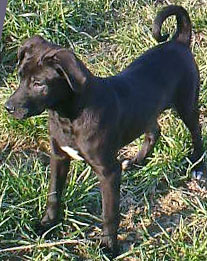

In [9]:
PIL.Image.open(str(dogs[1]))

In [10]:
pet_images_dict = {
    'cats': list(data_dir.glob('Cat/*')),
    'dogs': list(data_dir.glob('Dog/*')),
}

pet_labels_dict = {
    'cats': 0,
    'dogs': 1,
}

In [11]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
X, Y = [], []

for pet_name, images in pet_images_dict.items():
    print(pet_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            #print('image not found')
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(pet_labels_dict[pet_name])
        else:
            #print("Invalid Image")
            continue

cats
dogs


In [12]:
X = np.array(X)
Y = np.array(Y)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape) 
print(Y_test.shape)

9855 9855
3286 3286
(9855, 150, 150, 3)
(9855,)
(3286, 150, 150, 3)
(3286,)


In [14]:
len(Y_test)

3286

In [15]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [17]:
mkdir CNN-Model

In [18]:
backup_dir = "/content/CNN-Model"

In [19]:
import tensorflow as tf
call_backs = [tf.keras.callbacks.TensorBoard(log_dir='./logs'),
              tf.keras.callbacks.BackupAndRestore(backup_dir),
              tf.keras.callbacks.ModelCheckpoint("/content/CNN-Model",monitor="val_loss",save_best_only=True,save_weights_only=True,mode="auto",save_freq="epoch",
    
)]

In [37]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50,validation_data=(X_test, Y_test),callbacks = call_backs)

Epoch 1/50
308/308 [==============================] - 7s 21ms/step - loss: 0.2258 - accuracy: 0.9216 - val_loss: 0.2929 - val_accuracy: 0.9181
Epoch 2/50
308/308 [==============================] - 5s 18ms/step - loss: 0.2212 - accuracy: 0.9271 - val_loss: 0.3162 - val_accuracy: 0.9087
Epoch 3/50
308/308 [==============================] - 5s 17ms/step - loss: 0.1896 - accuracy: 0.9357 - val_loss: 0.3711 - val_accuracy: 0.9209
Epoch 4/50
308/308 [==============================] - 5s 17ms/step - loss: 0.1565 - accuracy: 0.9417 - val_loss: 0.3387 - val_accuracy: 0.9096
Epoch 5/50
308/308 [==============================] - 5s 17ms/step - loss: 0.1506 - accuracy: 0.9541 - val_loss: 0.3672 - val_accuracy: 0.9081
Epoch 6/50
308/308 [==============================] - 5s 17ms/step - loss: 0.1446 - accuracy: 0.9453 - val_loss: 0.4023 - val_accuracy: 0.9169
Epoch 7/50
308/308 [==============================] - 5s 17ms/step - loss: 0.0853 - accuracy: 0.9686 - val_loss: 0.5160 - val_accuracy: 0.9236

In [38]:
model.save('cnn_catvsdog.h5')

In [39]:
test_loss, test_acc = model.evaluate(X_test,  Y_test)

103/103 [==============================] - 1s 7ms/step - loss: 1.8363 - accuracy: 0.9166


In [40]:
test_acc*100

91.66159629821777

In [41]:
x = model.predict(X_test)

In [42]:
x

array([[4.01728166e-16],
       [1.82167120e-15],
       [5.15702294e-27],
       ...,
       [2.24055259e-19],
       [2.75180649e-13],
       [1.06059874e-16]], dtype=float32)

In [43]:
model.predict(X_test[:2])

array([[4.0172510e-16],
       [1.8216365e-15]], dtype=float32)

In [44]:
print(x[10])

[2.9544773e-09]


In [45]:
print(x.shape)

(3286, 1)


In [46]:


x[0]

array([4.0172817e-16], dtype=float32)

In [47]:
m = ("/content/cnn_catvsdog.h5")
m

'/content/cnn_catvsdog.h5'

In [48]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [49]:

import tensorflow as tf
import datetime

In [50]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 450), started 0:12:21 ago. (Use '!kill 450' to kill it.)

<IPython.core.display.Javascript object>

In [51]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs/fit (started 0:12:22 ago; pid 450)


In [52]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir logs/fit (started 0:12:22 ago; port 6006, pid 450).


<IPython.core.display.Javascript object>

In [53]:
!tensorboard dev upload \
  --logdir logs \
  --name "CATVSDOG_CNN" \
  --description "TB" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/UdQX2JruQxCVVdUPlSOBlg/

[2022-09-02T11:33:20] Started scanning logdir.
E0902 11:33:22.024395 140557709367168 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
[2022-09-02T11:33:22] Total uploaded: 360 scalars, 0 tensors, 1 binary objects (62.1 kB)
Total skipped: 1 binary objects (62.1 kB)
[2022-09-02T11:33:22] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/UdQX2JruQxCVVdUPlSOBlg/


In [ ]:
from PIL import Image
img = Image.fromarray(X_test[10],"RGB")
img.save("test_img.png")
img.show()

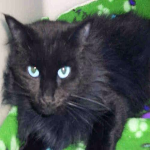

In [ ]:
PIL.Image.open(str("test_img.png"))